In [2]:
#phase 1

import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns

data = pd.read_csv('customer_analytics.csv')
print(data.head())

print("Data Types:", data.info())

print("Statistics Information of data", data.describe())

print("Rows:", data.shape[0])
print("Columns:", data.shape[1])

   CustomerID  Age  Gender    City  Education MaritalStatus  AnnualIncome  \
0        1001   49    Male    Pune    Masters        Single       82953.0   
1        1002   44    Male    Pune        PhD        Single       60610.0   
2        1003   42    Male  Mumbai  Bachelors        Single       35501.0   
3        1004   36  Female  Mumbai    Masters       Married       99312.0   
4        1005   23    Male    Pune    Masters       Married       46980.0   

   SpendingScore  YearsEmployed  PurchaseFrequency  OnlineVisitsPerMonth  \
0             66             23                 19                     9   
1             56             22                  1                    23   
2             44             18                 10                    29   
3             36             10                 12                    21   
4             56              1                 18                     9   

   ReturnedItems PreferredDevice  LastPurchaseAmount  
0              2         

This dataset contains information about customers, including their demographic details, income, purchase behavior, and online activity.

Each row represents one unique customer.

The dataset includes the following important features:

CustomerID: Unique identifier for each customer
Age: Age of the customer
Gender: Male or Female
City: Customer's city
Education: Education level
MaritalStatus: Married or Single
AnnualIncome: Customer’s yearly income
SpendingScore: Score assigned based on spending behavior
YearsEmployed: Years of employment
PurchaseFrequency: Number of purchases made
OnlineVisitsPerMonth: Website visits per month
ReturnedItems: Number of returned items
PreferredDevice: Device used for shopping
LastPurchaseAmount: Amount spent in last purchase

In [3]:
#phase 2
print("Checking for null values:", data.isnull().sum())

data['Education'].fillna(data['Education'].mode()[0], inplace=True)
data['AnnualIncome'].fillna(data['AnnualIncome'].median(), inplace=True)

print("\nAfter Cleaning the data:", data.isnull().sum())

Checking for null values: CustomerID               0
Age                      0
Gender                   0
City                     0
Education               12
MaritalStatus            0
AnnualIncome            12
SpendingScore            0
YearsEmployed            0
PurchaseFrequency        0
OnlineVisitsPerMonth     0
ReturnedItems            0
PreferredDevice          0
LastPurchaseAmount       0
dtype: int64

After Cleaning the data: CustomerID              0
Age                     0
Gender                  0
City                    0
Education               0
MaritalStatus           0
AnnualIncome            0
SpendingScore           0
YearsEmployed           0
PurchaseFrequency       0
OnlineVisitsPerMonth    0
ReturnedItems           0
PreferredDevice         0
LastPurchaseAmount      0
dtype: int64


In [4]:
data.duplicated().sum()

5

In [5]:
data.drop_duplicates(inplace=True)


Cleaning Summary

Missing values in Education filled using mode
Missing values in AnnualIncome filled using median
Duplicate rows removed
Dataset is now clean and ready for analysis.

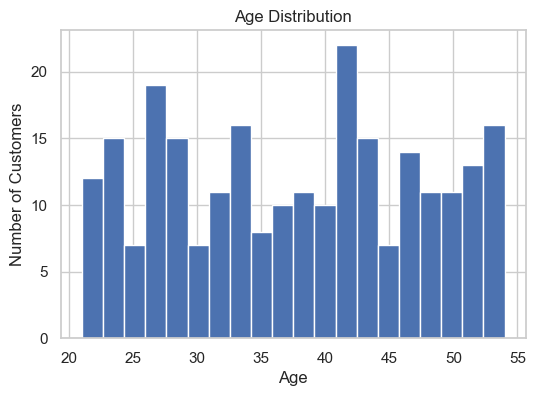

In [6]:

#phase 3

sns.set(style= 'whitegrid')
plt.figure(figsize=(6,4))
plt.hist(data['Age'], bins=20)
plt.title("Age Distribution")
plt.xlabel("Age")
plt.ylabel("Number of Customers")
plt.show()


Observation: Most customers are between age 25 and 45. This suggests the platform is popular among young and middle-aged adults.

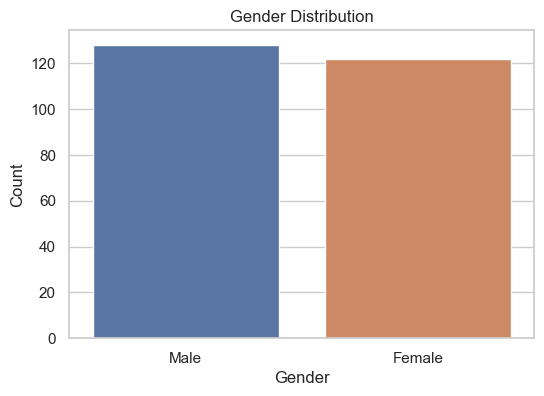

In [7]:

plt.figure(figsize=(6,4))
sns.countplot(x='Gender', data=data)
plt.title("Gender Distribution")
plt.xlabel("Gender")
plt.ylabel("Count")
plt.show()

Observation: Male and Female customers are nearly equally distributed, indicating balanced gender representation.

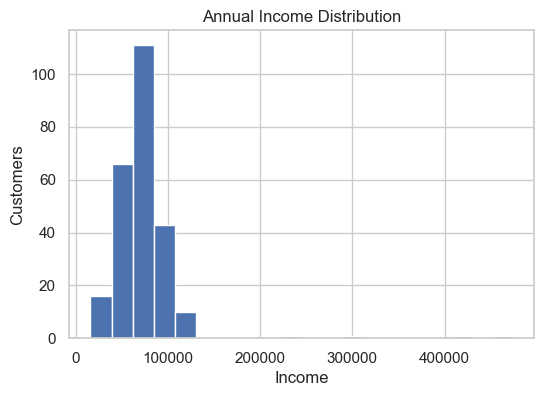

In [8]:
plt.figure(figsize=(6,4))
plt.hist(data['AnnualIncome'], bins=20)
plt.title("Annual Income Distribution")
plt.xlabel("Income")
plt.ylabel("Customers")
plt.show()


Observation: Most customers fall into middle income range, with few high-income outliers.

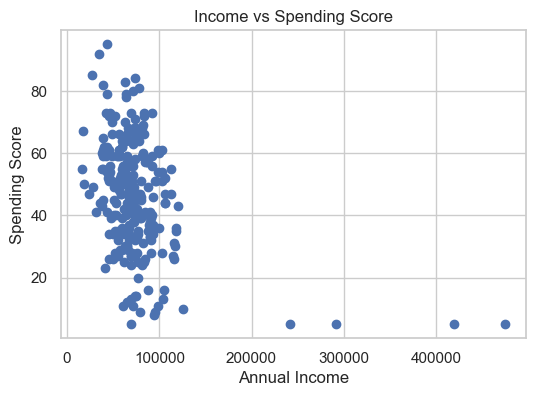

In [9]:
plt.figure(figsize=(6,4))
plt.scatter(data['AnnualIncome'], data['SpendingScore'])
plt.title("Income vs Spending Score")
plt.xlabel("Annual Income")
plt.ylabel("Spending Score")
plt.show()


Observation: Customers with higher income do not always spend more. Spending behavior varies significantly.

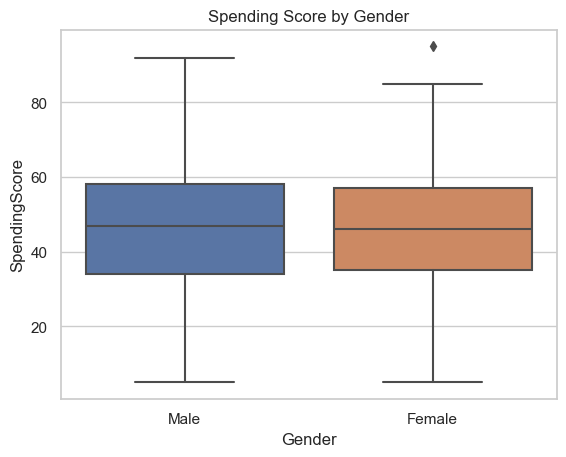

In [10]:
sns.boxplot(x='Gender', y='SpendingScore', data=data)
plt.title("Spending Score by Gender")
plt.show()



Observation: Both genders show similar spending patterns with slight variation.

In [11]:
corr = data.corr(numeric_only=True)
corr

,CustomerID,Age,AnnualIncome,SpendingScore,YearsEmployed,PurchaseFrequency,OnlineVisitsPerMonth,ReturnedItems,LastPurchaseAmount
CustomerID,1.000000,-0.038170,-0.039180,0.070869,-0.018877,-0.077040,-0.029642,0.023180,-0.034412
Age,-0.038170,1.000000,-0.051429,-0.006943,0.975242,0.103053,-0.033532,-0.051190,0.092891
AnnualIncome,-0.039180,-0.051429,1.000000,-0.384127,-0.054300,-0.036673,0.096734,-0.114378,-0.016602
SpendingScore,0.070869,-0.006943,-0.384127,1.000000,-0.017487,0.009792,-0.072441,0.057686,0.032737
YearsEmployed,-0.018877,0.975242,-0.054300,-0.017487,1.000000,0.073113,-0.052168,-0.050904,0.114464
PurchaseFrequency,-0.077040,0.103053,-0.036673,0.009792,0.073113,1.000000,-0.041362,0.084121,-0.068246
OnlineVisitsPerMonth,-0.029642,-0.033532,0.096734,-0.072441,-0.052168,-0.041362,1.000000,-0.071400,0.010528
ReturnedItems,0.023180,-0.051190,-0.114378,0.057686,-0.050904,0.084121,-0.071400,1.000000,0.016208
LastPurchaseAmount,-0.034412,0.092891,-0.016602,0.032737,0.114464,-0.068246,0.010528,0.016208,1.000000


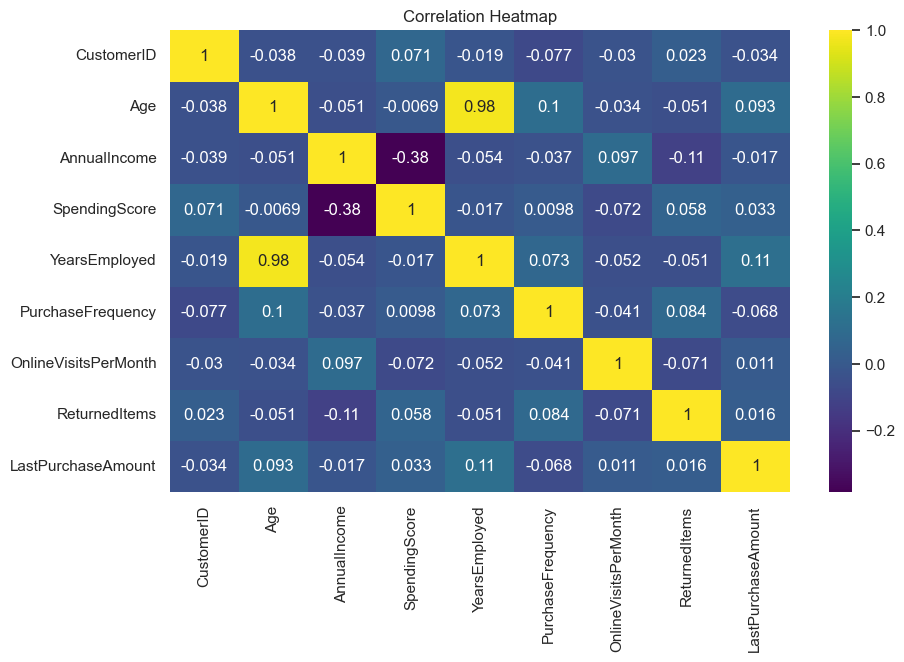

In [12]:
plt.figure(figsize=(10,6))
sns.heatmap(corr, annot=True, cmap='viridis')
plt.title("Correlation Heatmap")
plt.show()

Observation: Strong correlations help identify relationships such as income, spending, and purchase frequency.

Executive Summary

Top 3 Insights:

Most customers are aged between 25–45, indicating young and middle-aged users dominate.
Annual income does not strongly determine spending score — behavior varies by individual.
Purchase activity is influenced more by engagement (online visits, frequency) rather than income alone.
Conclusion: Customer engagement metrics are more useful predictors of spending than demographic features alone.

Improvement Ideas

Provide special offers to high-spending customers to increase retention.
Target low-spending customers with personalized promotions.
Improve online experience to increase engagement and purchases.
Segment customers for more effective marketing strategies.
Reduce product returns by improving product quality and support.